# Pokémon Color Distribution Visualization

This notebook fetches Pokémon data using a SPARQL query from Wikidata and creates a bar chart showing the distribution of Pokémon by color. The bars are colored according to the Pokémon colors, and white bars have a distinct black border for better visibility.

In [1]:

from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

def querySparql(query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.queryAndConvert()
    return results['results']['bindings']
    

## Define the SPARQL Query

In [2]:

pokemonQuery = """
SELECT DISTINCT ?pokemon ?pokemonLabel ?pokedexNumber ?color ?colorLabel
WHERE
{
    ?pokemon wdt:P31/wdt:P279* wd:Q3966183 .
    ?pokemon p:P1685 ?statement.
    ?pokemon wdt:P462 ?color.
    ?statement ps:P1685 ?pokedexNumber;
              pq:P972 wd:Q20005020.
    FILTER ( !isBLANK(?pokedexNumber) ) .
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
ORDER BY (?pokedexNumber)
"""
    

## Fetch Data and Convert to DataFrame

In [3]:

# Fetch data using the SPARQL query
sparql_results = querySparql(pokemonQuery)

# Convert SPARQL JSON results into a DataFrame
data = []
for result in sparql_results:
    data.append({
        "pokemon": result['pokemon']['value'],
        "pokemonLabel": result['pokemonLabel']['value'],
        "pokedexNumber": int(result['pokedexNumber']['value']),
        "color": result['color']['value'],
        "colorLabel": result['colorLabel']['value'],
    })

# Create a DataFrame
df = pd.DataFrame(data)
df
    

,pokemon,pokemonLabel,pokedexNumber,color,colorLabel
0,http://www.wikidata.org/entity/Q847571,Bulbasaur,1,http://www.wikidata.org/entity/Q3133,green
1,http://www.wikidata.org/entity/Q1636903,Ivysaur,2,http://www.wikidata.org/entity/Q3133,green
2,http://www.wikidata.org/entity/Q2283930,Venusaur,3,http://www.wikidata.org/entity/Q3133,green
3,http://www.wikidata.org/entity/Q3178753,Charmander,4,http://www.wikidata.org/entity/Q3142,red
4,http://www.wikidata.org/entity/Q1637365,Charmeleon,5,http://www.wikidata.org/entity/Q3142,red
...,...,...,...,...,...
982,http://www.wikidata.org/entity/Q116699173,Iron Thorns,995,http://www.wikidata.org/entity/Q3133,green
983,http://www.wikidata.org/entity/Q116699174,Frigibax,996,http://www.wikidata.org/entity/Q42519,gray
984,http://www.wikidata.org/entity/Q116699175,Arctibax,997,http://www.wikidata.org/entity/Q42519,gray
985,http://www.wikidata.org/entity/Q116699177,Baxcalibur,998,http://www.wikidata.org/entity/Q42519,gray


## Visualize the Data with a Bar Chart

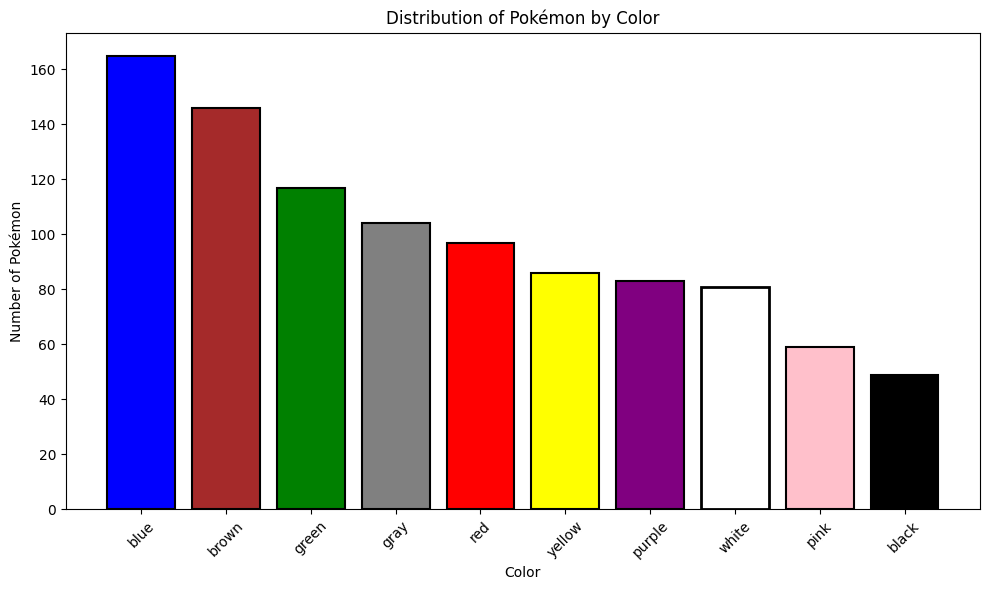

In [4]:

# Check if DataFrame is populated
if df.empty:
    print("No data retrieved from the query.")
else:
    # Bar chart: Count Pokémon by color
    color_counts = df['colorLabel'].value_counts()

    # Map color labels to actual colors
    color_mapping = {
        "red": "red",
        "blue": "blue",
        "green": "green",
        "yellow": "yellow",
        "purple": "purple",
        "pink": "pink",
        "brown": "brown",
        "white": "white",
        "black": "black",
        "gray": "gray",
    }

    # Create a list of bar colors based on the color labels
    bar_colors = [color_mapping.get(color.lower(), "gray") for color in color_counts.index]

    # Plot the bar chart with black edges
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        color_counts.index, 
        color_counts.values, 
        color=bar_colors, 
        edgecolor="black",  # Add black border
        linewidth=1.5      # Adjust border thickness
    )
    
    # Customize the white bar to ensure visibility
    for bar, color in zip(bars, bar_colors):
        if color == "white":
            bar.set_edgecolor("black")
            bar.set_linewidth(2)

    plt.title("Distribution of Pokémon by Color")
    plt.xlabel("Color")
    plt.ylabel("Number of Pokémon")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    